In [1]:
# 1. Try other values of lambd, k
# 2. Build graph using this and run CC/networkx on it
# 3. Visualize by making subplot 312 313 as wide as 1:1 unit:unit suggests
# 4. Try other distance metrices
# 5. Idea: to close the feedback loop for finding parameters, need to develop training data (hand-labeled by Mohammed)?
#      -benefit: would not have to physically ask him
# TODO: eliminate duplicates in tweet body (they are spam)

import numpy as np
data = np.genfromtxt('tweet.csv', delimiter=",")
print data[0][0]

1.46127409465e+12


In [8]:
# Normalization
lambd = 10/(24*3.6e+6)
k=10
STOP=142
mydata = data[:STOP,:]
mydata[:STOP,0] = data[:STOP,0]*lambd
400/(lambd*3600*1000*24)
print mydata[0,0], mydata[141,0]
print len(mydata)

0.019575109507 0.0195815349314
142


In [9]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(mydata)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [10]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print labels

[7 8 0 1 1 1 1 3 6 3 6 0 3 3 3 8 8 3 3 3 3 3 1 3 1 3 1 4 1 1 1 1 3 7 6 6 8
 7 6 6 0 0 0 0 0 6 7 6 4 3 7 9 1 9 3 6 9 1 6 6 9 0 7 6 6 7 1 5 4 2 2 2 4 1
 6 1 1 1 1 1 7 1 6 6 6 7 1 1 1 1 1 1 1 1 6 1 7 6 1 1 1 4 7 7 9 0 7 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 7 7 1 1 7 7 8 8 8 4 0 7 6 6 6]


In [22]:
data_label = np.loadtxt('tweet_label.txt', dtype=np.str, delimiter="\n")
label_list = np.zeros(len(mydata))-1
count = 0
for i in range(len(data_label)):
    if data_label[i][2:6]=='http' or data_label[i][3:7]=='http':
        try:
            label_list[count] = int(data_label[i][0:2])
            count+=1
            if count==len(mydata):
                break
            #print( data_label[i][0:2])
        except ValueError:
            continue

In [23]:
print np.where(label_list>=0)
print np.where(labels==0)
print np.where(np.logical_and(label_list>=0, labels==0))

(array([  0,   1,   2,   7,   8,  12,  13,  14,  15,  16,  21,  28,  29,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        47,  49,  50,  51,  53,  54,  55,  56,  58,  59,  60,  61,  63,
        64,  67,  69,  71,  74,  75,  76,  77,  78,  79,  82,  97,  98,
       104, 105, 132, 133, 134, 136, 141]),)
(array([  2,  11,  40,  41,  42,  43,  44,  61, 105, 137]),)
(array([  2,  40,  41,  42,  43,  44,  61, 105]),)


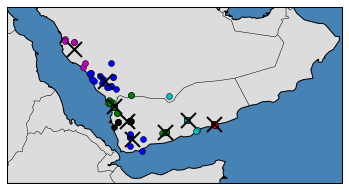

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap
import numpy as np

# Lambert Conformal Conic map.
fig1 = plt.figure()
resolution = 1
themap = Basemap(projection='gall',
              llcrnrlon = 35,
              llcrnrlat = 10,
              urcrnrlon = 60,
              urcrnrlat = 25,
              resolution = 'l',
              area_thresh = 100000.0,
              #width = 20,
              #height = 10,
              )

themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

def draw_screen_poly( lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = patches.Polygon( xy, facecolor='red', alpha=0.4 )
    plt.gca().add_patch(poly)

for i in range(k):
    
    # select only data observations with cluster label == i
    ds = mydata[np.where(labels==i)]
    # plot the data observations
    x, y = themap(ds[:,1],ds[:,2])
    themap.plot( x,y,'o' )
    center_x, center_y = themap( centroids[i,1], centroids[i,2] )
    #plt.plot(ds[:,1],ds[:,2],'o')
    # plot the centroids
    #lines = plt.plot(centroids[i,1],centroids[i,2],'kx')
    lines = themap.plot(center_x, center_y, 'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

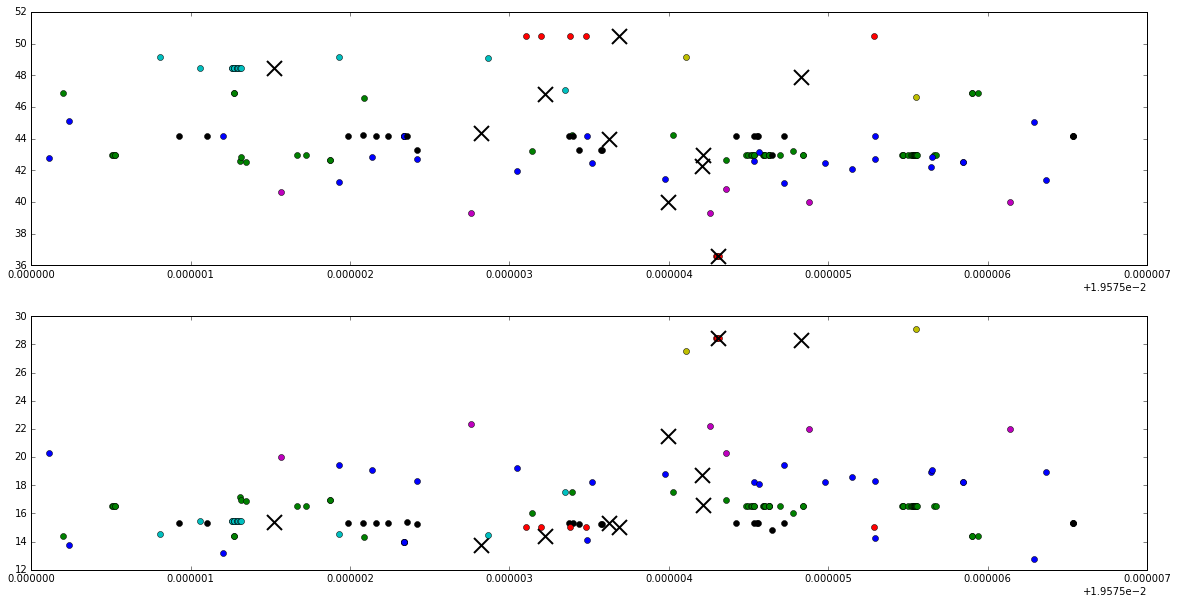

In [20]:
fig = plt.figure(figsize=(20,10))
#f, axarr = plt.subplots(2, sharex=True)
for i in range(k):
    
    # select only data observations with cluster label == i
    ds = mydata[np.where(labels==i)]
    # plot the data observations
    ax1 = plt.subplot(211)
    ax1 = plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines1 = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines1,ms=15.0)
    plt.setp(lines1,mew=2.0)
    
    ax2 = plt.subplot(212)
    ax2 = plt.plot(ds[:,0],ds[:,2],'o')
    lines2 = plt.plot(centroids[i,0],centroids[i,2],'kx')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
plt.show()

None
[[  1.95778196e-02   4.43563271e+01   1.37938658e+01]
 [  1.95792147e-02   4.29925110e+01   1.65892386e+01]
 [  1.95793062e-02   3.65716735e+01   2.84199007e+01]
 [  1.95765238e-02   4.84790955e+01   1.54116478e+01]
 [  1.95789929e-02   4.00228881e+01   2.14743789e+01]
 [  1.95798304e-02   4.79105945e+01   2.83044283e+01]
 [  1.95786224e-02   4.39613800e+01   1.53053690e+01]
 [  1.95792076e-02   4.22900269e+01   1.87584216e+01]
 [  1.95782242e-02   4.68131276e+01   1.44028890e+01]
 [  1.95786885e-02   5.04766506e+01   1.50389147e+01]]


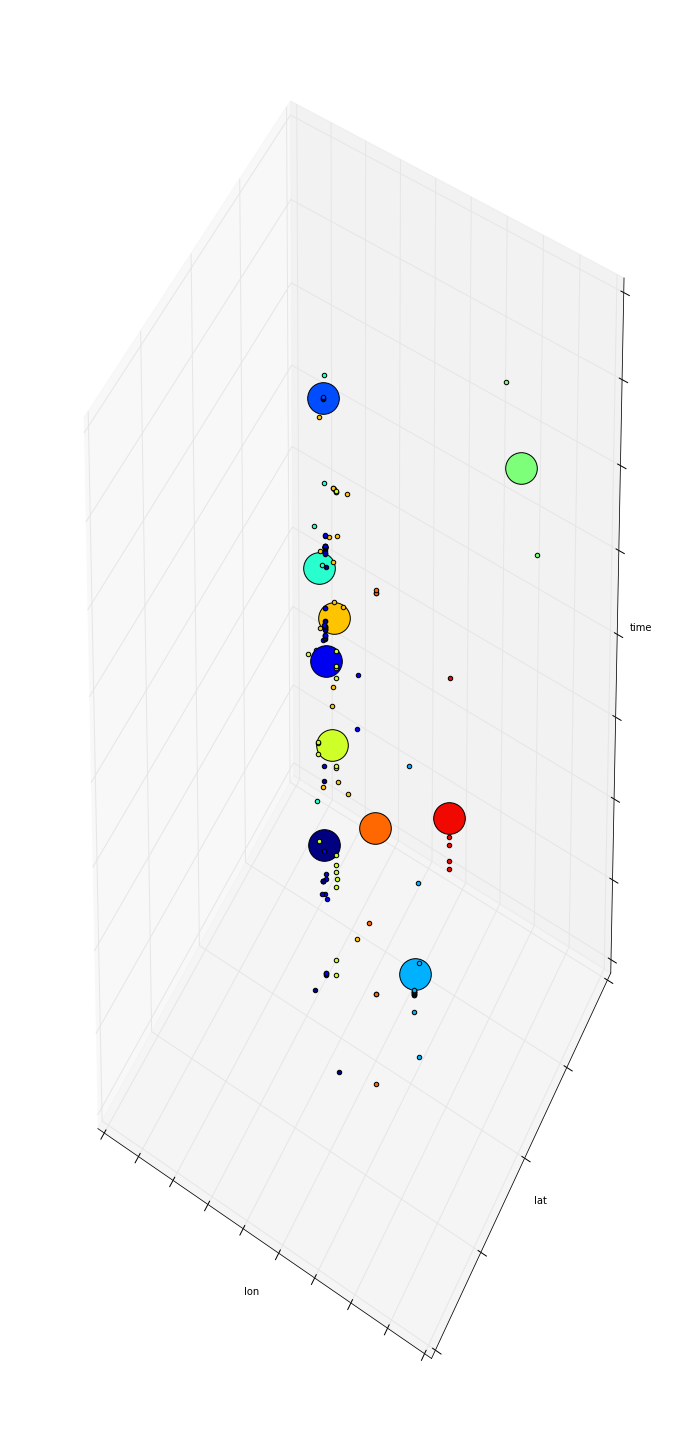

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(1, figsize=(10,20))#plt.figaspect(2), figsize=(10, 8))
plt.clf()
ax = fig.gca(projection='3d')

ax = Axes3D(fig, rect=[0, 0.05, .95, 1])#, elev=48, azim=134)

plt.cla()

cmap = mpl.cm.jet
print ax.set_autoscale_on(True)

for i in range(k):
    ds = mydata[np.where(labels==i)]
    ax.scatter(ds[:, 1], ds[:, 2], ds[:, 0], c=cmap(i / float(k)), depthshade=False) #labels.astype(np.float), depthshade=False)
    lines = ax.scatter(centroids[i,1],centroids[i,2],centroids[i,0],c=cmap(i / float(k)),s=1000)
    #ax.setp(lines,ms=15.0)
    #ax.setp(lines,mew=2.0)
print centroids
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('time')
plt.show()
fig.savefig('plot.png', bbox_inches='tight')